In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load dataset
df = pd.read_csv("../data/ecr_data.csv")
df.head()


,ECR_ID,Product_Type,Component_Name,Change_Type,Change_Complexity,Supplier_Criticality,Past_Similar_Changes,Team_Experience_Level,BOM_Depth,Urgency,Approval_Time_Days,Parts_Affected,Risk_Score
0,ECR_1000,Chassis,Frame,Process,3,4,2,5,4,Low,14,10,0.350421
1,ECR_1001,Display,Connector,Process,5,5,1,5,3,High,16,7,0.383295
2,ECR_1002,PCB,Cell,Process,5,5,3,4,3,Medium,19,8,0.386081
3,ECR_1003,Display,Valve,Design,5,5,0,5,7,High,11,14,0.385286
4,ECR_1004,Display,Controller,Supplier,8,1,2,2,2,Medium,14,6,0.337829


In [30]:
df.columns

Index(['ECR_ID', 'Product_Type', 'Component_Name', 'Change_Type',
       'Change_Complexity', 'Supplier_Criticality', 'Past_Similar_Changes',
       'Team_Experience_Level', 'BOM_Depth', 'Urgency', 'Approval_Time_Days',
       'Parts_Affected', 'Risk_Score'],
      dtype='object')

In [31]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2000, 13)


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ECR_ID                 2000 non-null   object 
 1   Product_Type           2000 non-null   object 
 2   Component_Name         2000 non-null   object 
 3   Change_Type            2000 non-null   object 
 4   Change_Complexity      2000 non-null   int64  
 5   Supplier_Criticality   2000 non-null   int64  
 6   Past_Similar_Changes   2000 non-null   int64  
 7   Team_Experience_Level  2000 non-null   int64  
 8   BOM_Depth              2000 non-null   int64  
 9   Urgency                2000 non-null   object 
 10  Approval_Time_Days     2000 non-null   int64  
 11  Parts_Affected         2000 non-null   int64  
 12  Risk_Score             2000 non-null   float64
dtypes: float64(1), int64(7), object(5)
memory usage: 203.2+ KB
None


In [4]:
print(df.describe())

       Change_Complexity  Supplier_Criticality  Past_Similar_Changes  \
count        2000.000000           2000.000000           2000.000000   
mean            5.543000              2.920000              2.015500   
std             2.892462              1.418664              1.459563   
min             1.000000              1.000000              0.000000   
25%             3.000000              2.000000              1.000000   
50%             6.000000              3.000000              2.000000   
75%             8.000000              4.000000              3.000000   
max            10.000000              5.000000              8.000000   

       Team_Experience_Level   BOM_Depth  Approval_Time_Days  Parts_Affected  \
count            2000.000000  2000.00000         2000.000000     2000.000000   
mean                2.990000     3.93550           14.831000       10.235000   
std                 1.412763     2.03357            5.671818        4.661506   
min                 1.000000   

In [12]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ECR_ID                   0
Product_Type             0
Component_Name           0
Change_Type              0
Change_Complexity        0
Supplier_Criticality     0
Past_Similar_Changes     0
Team_Experience_Level    0
BOM_Depth                0
Urgency                  0
Approval_Time_Days       0
Parts_Affected           0
Risk_Score               0
dtype: int64


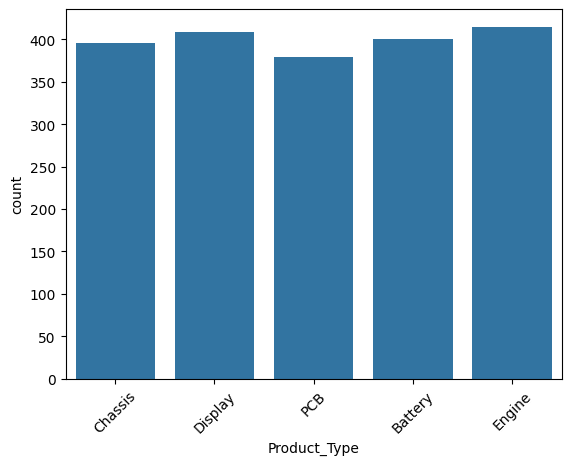

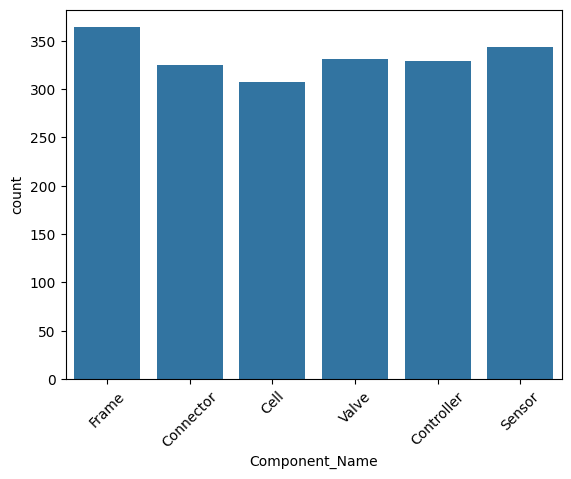

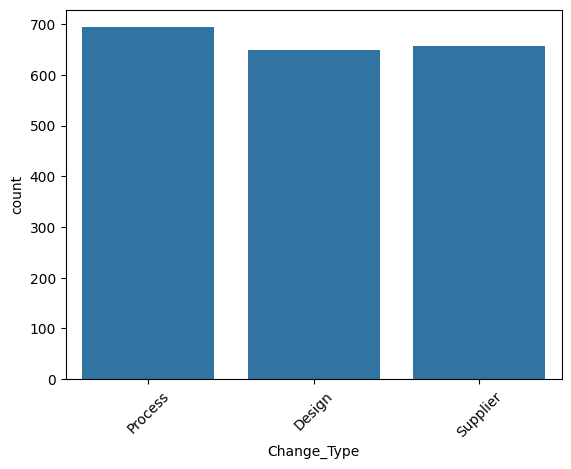

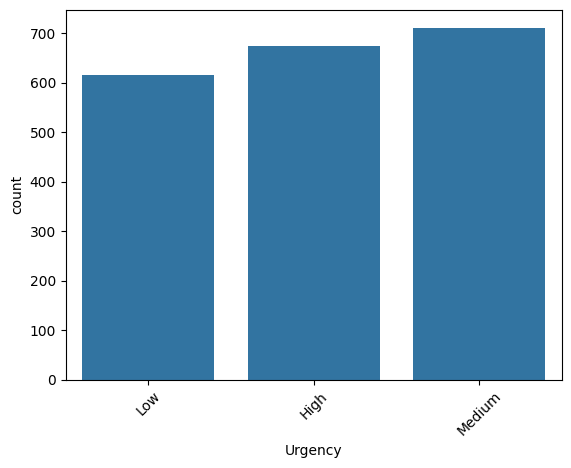

In [ ]:
# Categorical Distributions

categorical_cols = ["Product_Type", "Component_Name", "Change_Type", "Urgency"]
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()

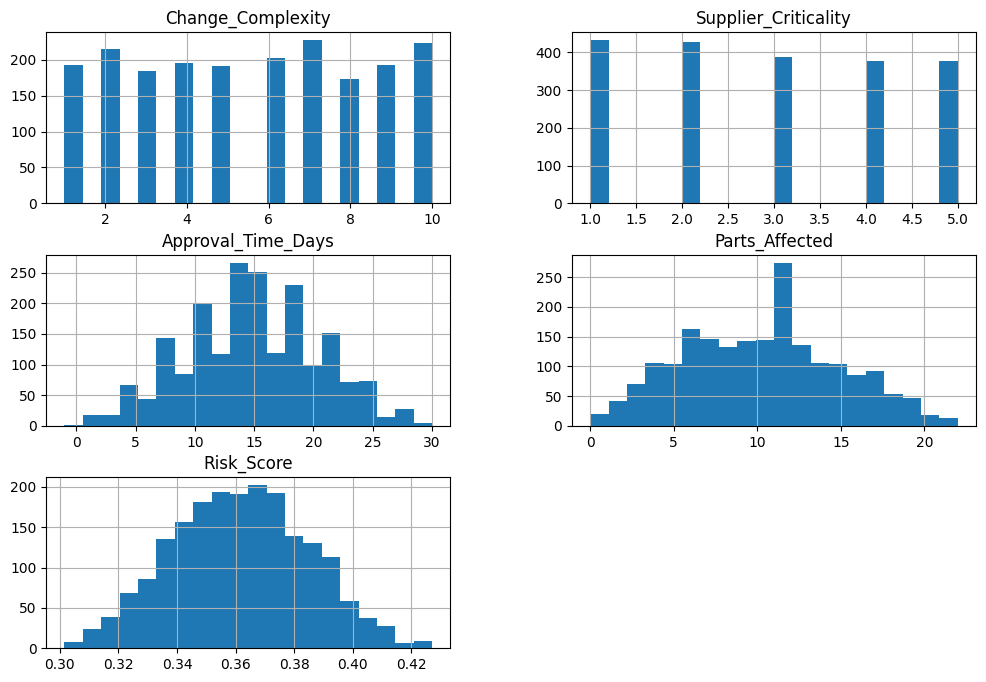

In [ ]:
# Numerical Feature Distributions

numeric_cols = ["Change_Complexity", "Supplier_Criticality", "Approval_Time_Days", "Parts_Affected", "Risk_Score"]
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.show()

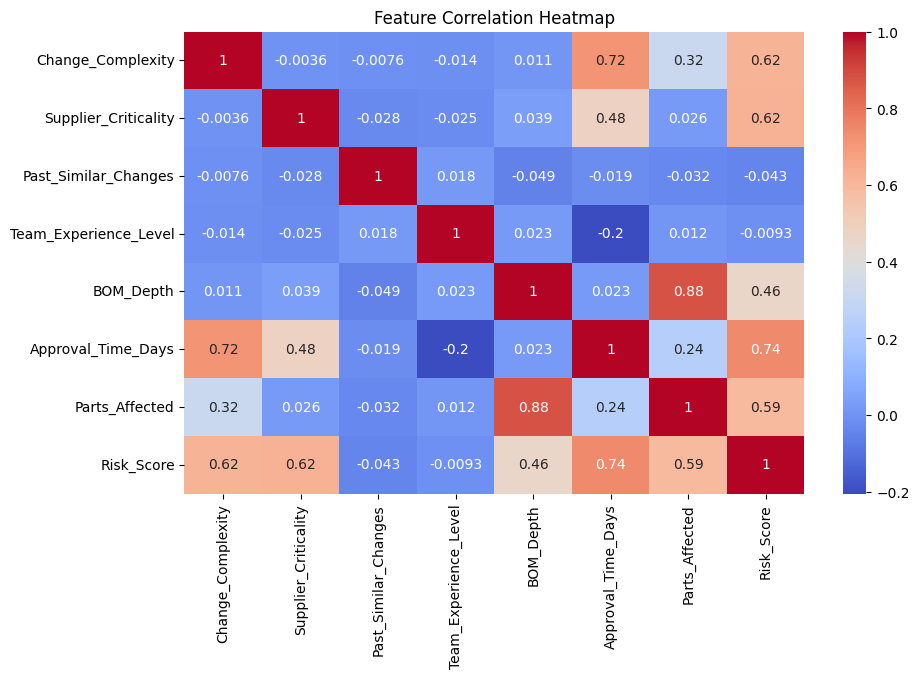

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Interactive Plotly Example

fig = px.scatter(df, x="Change_Complexity", y="Approval_Time_Days", color="Change_Type",
                 size="Parts_Affected", hover_data=["Product_Type"])
fig.show()
